## Importaciones

* pandas

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Lectura de Datos
Se leen los datos del archivo de entrada.

In [6]:
content = pd.read_csv('./winequality-red.csv', sep=';')

content.info()
content.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Limpieza de Datos

* Eliminación de filas con datos faltantes.
* Eliminación de filas duplicadas.

In [7]:
content.dropna(inplace=True)
content.drop_duplicates(inplace=True)

content.info()
content.tail()

print("Filas:", content.shape[0])

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB
Filas: 1359


## Resumen Estadístico

Se muestran algunos datos relevantes para cada columna como cantidad de datos no nulos, promedio, desviación estándar, percentiles, mínimo y máximo.

In [8]:
content.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Matriz de Correlación

In [9]:
matrix = content.corr()

## Gráficos

### Densidad de Alcohol por Calidad

* La calidad 5 tiene su pico de densidad de alcohol alrededor del 9.5% al 10.0%.
* La calidad 6 muestra su pico de densidad alrededor del 10.5% al 11%.
* Las calidades 3 y 4 tienen distribuciones muy planas y se superponen con las calidades 5 y 6. La calidad 4 tiene un pequeña pico alrededor del 10%.
* Las calidades 7 y 8 también tienen una distribución muy baja y se superponen con las demás. La calidad 7 muestra un leve pico alrededor del 12.5% y la calidad 8 cerca del 12%.

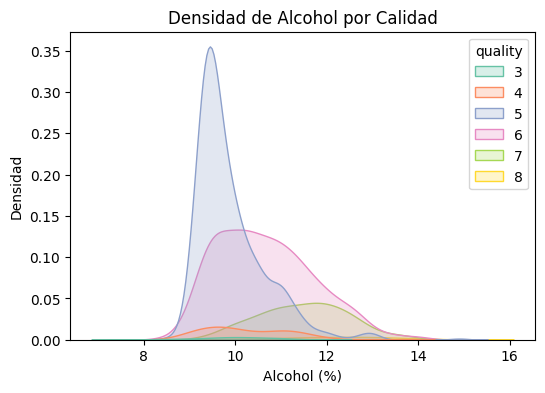

In [31]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=content, x='alcohol', hue='quality', fill=True, palette='Set2')
plt.title("Densidad de Alcohol por Calidad")
plt.xlabel("Alcohol (%)")
plt.ylabel("Densidad")
plt.show()

### Distribución del pH según la Calidad

* Calidad 3-4: pH principalmente entre 3.3-3.5, con medianas alrededor de 3.45
* Calidad 5-6: pH con mayor variabilidad, medianas entre 3.3-3.4
* Calidad 7-8: pH más bajo y consistente, medianas alrededor de 3.2-3.25

C:\Users\bryan\AppData\Local\Temp\ipykernel_11824\2041630393.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='pH', data=content, palette='Set2')


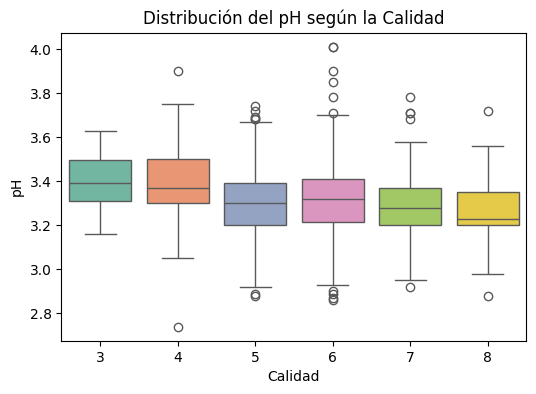

In [25]:
plt.figure(figsize=(6,4))
sns.boxplot(x='quality', y='pH', data=content, palette='Set2')
plt.title("Distribución del pH según la Calidad")
plt.xlabel("Calidad")
plt.ylabel("pH")
plt.show()

### Promedio de Alcohol por Calidad de Vino

* Casi todos los vinos siguen un patrón: a mayor calidad, más alcohol. Pero el vino de calidad 5 rompe esta regla, tiene menos alcohol que el de calidad 4.
* Entre el vino de peor calidad y el mejor hay una diferencia de aproximadamente 2 grados de alcohol.

C:\Users\bryan\AppData\Local\Temp\ipykernel_11824\2259870782.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y='alcohol', data=content, palette='Set2')


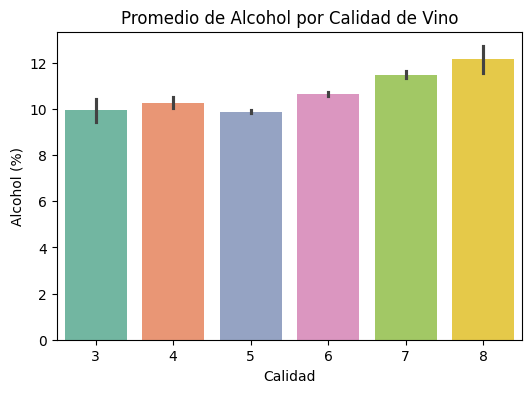

In [26]:
plt.figure(figsize=(6,4))
sns.barplot(x='quality', y='alcohol', data=content, palette='Set2')
plt.title("Promedio de Alcohol por Calidad de Vino")
plt.xlabel("Calidad")
plt.ylabel("Alcohol (%)")
plt.show()

## Conclusiones

* La mayor densidad de la distribución del alcohol se concentra en la calidad 5. Le sigue de cerca la calidad 6, con una distribución más amplia. El resto de las calidades (3, 4, 7 y 8) tienen una presencia mucho menor en la muestra, ya que sus curvas de densidad son significativamente más bajas y menos prominentes.
* Hay una tendencia decreciente del pH conforme aumenta el nivel de calidad. Los productos de menor calidad (calidad 3-4) tienden a tener valores de pH más altos, mientras que los de mayor calidad (calidad 7-8) presentan valores de pH más bajos.
* Hay una tendencia creciente clara del contenido alcohólico conforme aumenta la calidad del vino. Existe una correlación positiva entre el nivel de alcohol y la calidad percibida.